# EXERCISE
In this exercise you will write the key components of both a Q-learning and SARSA agent and train them to solve the frozen lake environment: https://www.gymlibrary.dev/environments/toy_text/frozen_lake/ . This simple environment will serve as a test that your agents are working correctly. We will then apply these agents on a simple bioreactor control problem based on the work in the following paper: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007783. 

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

import sys

!ls /content/gdrive/MyDrive/Colab\ Notebooks

sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/L2D-reinforcement_learning/lib')

Mounted at /content/gdrive
agents_nt.py					L2D-reinforcement_learning
BIOS0040-CPS-10-frozen-lake.ipynb		__pycache__
BIOS0040-CPS-10-frozen-lake_solution.ipynb	utils_nt.py
BIOS0040-Week-10-practical-cliff-walking.ipynb	W10_lecture1.pptx


In [2]:
!pip install gymnasium[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 78.2 MB/s eta 0:00:00


In [3]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1

In [7]:
import gymnasium as gym

import os

from utils_nt import plot_value, plot_returns, plot_explore, train_agent
from bioreactor_env_nt import BioreactorEnv, xdot_control, monod, target_reward

import numpy as np
import matplotlib.pyplot as plt
import math

from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
import time



# 1. Fill in the Q learning agent's policy and update function 
You will need to:
- Initialise the Q_func. Create a numpy array full of zeros which will store the values for all the state-action pairs. 
- Write code for the epsilon greedy policy. Use the np.random.random function to determine whether the agent should take a random exploratory action with the explore_rate. If an exploratory action is taken, choose an action randomly from the set of available actions using the np.random.choice function. If we instead take a exploitative action use the np.argmax function to take the action with the highest value given the current state. 
- Write code for the update_Q function. This should increment the Q_func for the current state-action pair according to the Q-learning update rule.

If you get stuck the code examples in the slides will help

In [11]:
class Q_agent():

    def __init__(self, n_states, n_actions, gamma = 0.95, alpha = 0.01):

        self.gamma = gamma
        self.alpha = alpha
        self.n_states = n_states
        self.n_actions = n_actions
        self.Q_func = np.zeros((n_states, n_actions))


    def policy(self, state, explore_rate):
        '''
        chooses an action based on the agents value function and the current explore rate
        :param state: the current state given by the environment
        :param explore_rate: the chance of taking a random action
        :return: the action to be taken
        '''

        # YOUR CODE HERE
        #
        #
        

        return action
    
    def update_Q(self,transition):
        '''
        updates the agents value function based on the experience in transition
        :param transition:
        :return:
        '''
        state, action, reward, next_state, next_action, done = transition

        # YOUR CODE HERE
        #
        #

    def get_explore_rate(self, episode, decay, min_r = 0, max_r = 1):
        '''
        Calculates the logarithmically decreasing explore or learning rate

        Parameters:
            episode: the current episode
            MIN_LEARNING_RATE: the minimum possible step size
            MAX_LEARNING_RATE: maximum step size
            denominator: controls the rate of decay of the step size
        Returns:
            step_size: the Q-learning step size
        '''
        rate = max(min_r, min(max_r, 1.0 - math.log10((episode + 1) / decay)))

        return rate


    

In [ ]:
#

## 2. Train the Q learning agent
Train and test the Q_learning agent using the code below

Examine the output plots:
- Do the output plots indicate that you agent has been trained sucessfully
- Has it found the optimal policy? If not try and debug. 

In [12]:
# train the agent 

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode = 'rgb_array', )
# ******* Your code here *******
# Fill in these variables, look at the OpenAIGym documentation to find the correct values 
n_states = 
n_actions = 
grid_shape = 

p_map = {0:'L', 1:'D', 2:'R', 3:'U'}

agent = Q_agent(n_states, n_actions)
n_episodes = 10001

print('TRAINING')
returns = train_agent(agent, env, n_episodes = n_episodes) # train the agent
    

TRAINING
episode: 0 , explore_rate: 1 , return: 0.0
episode: 100 , explore_rate: 1 , return: 0.0
episode: 200 , explore_rate: 1 , return: 0.0
episode: 300 , explore_rate: 1 , return: 0.0
episode: 400 , explore_rate: 1 , return: 0.0
episode: 500 , explore_rate: 1 , return: 0.0
episode: 600 , explore_rate: 1 , return: 0.0
episode: 700 , explore_rate: 1 , return: 0.0
episode: 800 , explore_rate: 1 , return: 0.0
episode: 900 , explore_rate: 1 , return: 0.0
episode: 1000 , explore_rate: 0.958216664639319 , return: 0.0
episode: 1100 , explore_rate: 0.9168634231468858 , return: 0.0
episode: 1200 , explore_rate: 0.8791077347157316 , return: 0.0
episode: 1300 , explore_rate: 0.8443734455570514 , return: 0.0
episode: 1400 , explore_rate: 0.812212606832863 , return: 0.0
episode: 1500 , explore_rate: 0.7822700498753672 , return: 0.0
episode: 1600 , explore_rate: 0.7542594101993378 , return: 0.0
episode: 1700 , explore_rate: 0.7279464285060686 , return: 0.0
episode: 1800 , explore_rate: 0.703137029

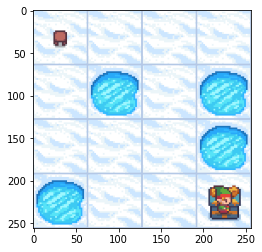

In [14]:
# Run a test episode
print()
print('TEST EPISODE')
r = train_agent(agent, env, n_episodes=1, display=True) # run a test episode to get the learned behaviour with no exploring


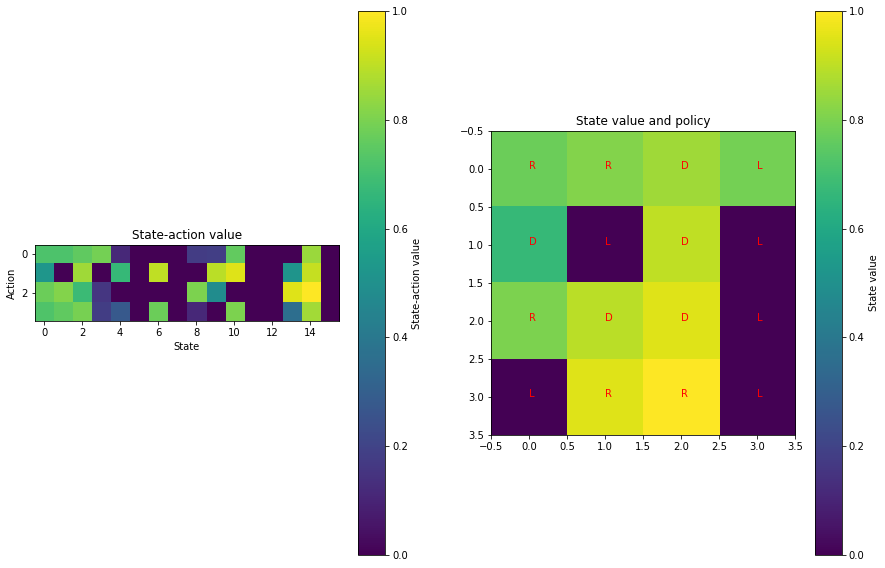

In [15]:
# plot the value function and policy
plot_value(agent.Q_func, grid_shape, p_map) 


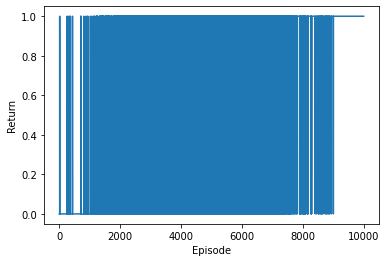

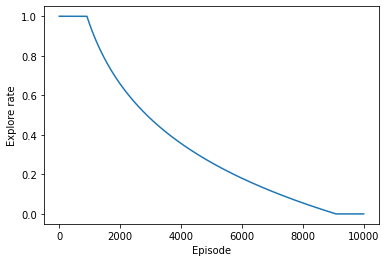

In [16]:
# plot returns and explore rate 
plot_returns(returns)
plot_explore(agent.get_explore_rate, n_episodes)

# 3. Now create a  SARSA_agent. 
- Hint: the initialisation and the policy functions will be the same as the Q_agent, just change the update_Q function to increment the Q_func for the current state-action pair according to the SARSA update rule.


In [17]:
class SARSA_agent():

    def __init__(self, n_states, n_actions, gamma = 0.95, alpha = 0.01):

        self.gamma = gamma
        self.alpha = alpha
        self.n_states = n_states
        self.n_actions = n_actions
        self.Q_func = np.zeros((n_states, n_actions))


    def policy(self, state, explore_rate):
        '''
        chooses an action based on the agents value function and the current explore rate
        :param state: the current state given by the environment
        :param explore_rate: the chance of taking a random action
        :return: the action to be taken
        '''


        # YOUR CODE HERE, This will be the same as for the Q agent
        #
        #

        return action
    
    def update_Q(self,transition):
        '''
        updates the agents value function based on the experience in transition
        :param transition:
        :return:
        '''

        state, action, reward, next_state, next_action, done = transition

        # YOUR CODE HERE
        #
        #
    def get_explore_rate(self, episode, decay, min_r = 0, max_r = 1):
        '''
        Calculates the logarithmically decreasing explore or learning rate

        Parameters:
            episode: the current episode
            MIN_LEARNING_RATE: the minimum possible step size
            MAX_LEARNING_RATE: maximum step size
            denominator: controls the rate of decay of the step size
        Returns:
            step_size: the Q-learning step size
        '''

        rate = max(min_r, min(max_r, 1.0 - math.log10((episode + 1) / decay)))

        return rate


## 4. Train the SARSA learning agent
Train and test the SARSA_learning agent using the code below

Examine the output plots:
- Do the output plots indicate that you agent has been trained sucessfully?
- Has it found the optimal policy? If not try and debug. 

In [19]:
# train the agent 
agent = SARSA_agent(n_states, n_actions)
n_episodes = 10001

print('TRAINING')
returns = train_agent(agent, env, n_episodes = n_episodes) # train the agent
    

TRAINING
episode: 0 , explore_rate: 1 , return: 0.0
episode: 100 , explore_rate: 1 , return: 0.0
episode: 200 , explore_rate: 1 , return: 0.0
episode: 300 , explore_rate: 1 , return: 0.0
episode: 400 , explore_rate: 1 , return: 0.0
episode: 500 , explore_rate: 1 , return: 0.0
episode: 600 , explore_rate: 1 , return: 0.0
episode: 700 , explore_rate: 1 , return: 0.0
episode: 800 , explore_rate: 1 , return: 0.0
episode: 900 , explore_rate: 1 , return: 0.0
episode: 1000 , explore_rate: 0.958216664639319 , return: 0.0
episode: 1100 , explore_rate: 0.9168634231468858 , return: 0.0
episode: 1200 , explore_rate: 0.8791077347157316 , return: 0.0
episode: 1300 , explore_rate: 0.8443734455570514 , return: 0.0
episode: 1400 , explore_rate: 0.812212606832863 , return: 0.0
episode: 1500 , explore_rate: 0.7822700498753672 , return: 0.0
episode: 1600 , explore_rate: 0.7542594101993378 , return: 0.0
episode: 1700 , explore_rate: 0.7279464285060686 , return: 1.0
episode: 1800 , explore_rate: 0.703137029

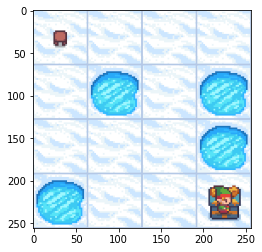

In [22]:
# Run a test episode
print()
print('TEST EPISODE')
r = train_agent(agent, env, n_episodes=1, display=True) # run a test episode to get the learned behaviour with no exploring


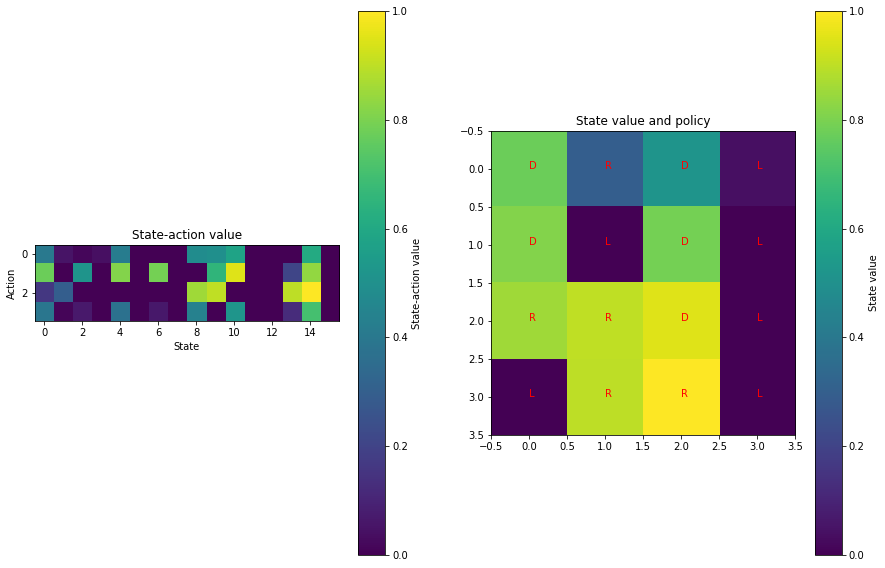

In [23]:
# plot the value function and policy
plot_value(agent.Q_func, grid_shape, p_map) 


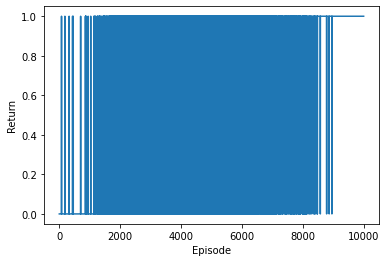

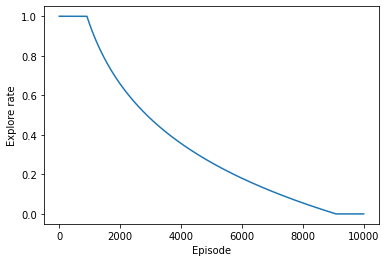

In [24]:
# plot returns and explore rate 
plot_returns(returns)
plot_explore(agent.get_explore_rate, n_episodes)

## Bioreactor control
Now that we know your agents are working on this simple enviroment, apply your Q-learning agent to the biorector control case study. This is a problem for which reinforcment learning has been shown to be a potential control method. See the paper here for more info: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007783

In [26]:
num_controlled_species = 1

sampling_time = 5  # minutes
n_episodes = 1001

t_steps = int((24 * 60) / sampling_time)  # set this to 24 hours

target_pop = 35000

reward_f = lambda x: target_reward(x, target_pop)


initial_x = np.array([20000, 0, 1])  # the initial state

env = BioreactorEnv(xdot_control, reward_f, sampling_time,
                    num_controlled_species, initial_x, t_steps)  # initalise the chemostat environment



n_states = 10
n_actions = 2
agent = Q_agent(n_states, n_actions)


returns = train_agent(agent, env, n_episodes= n_episodes)


episode: 0 , explore_rate: 1 , return: -4.224389856982342
episode: 100 , explore_rate: 0.954720018538451 , return: -3.395132350734053
episode: 200 , explore_rate: 0.6558453349006047 , return: -1.6403372099430684
episode: 300 , explore_rate: 0.4804748967272503 , return: -0.9074610694975314
episode: 400 , explore_rate: 0.35589701970091125 , return: -0.6679907586769256
episode: 500 , explore_rate: 0.25920366645384785 , return: -0.5026212101234298
episode: 600 , explore_rate: 0.18016692031835402 , return: -0.477496855424837
episode: 700 , explore_rate: 0.11332337435443496 , return: -0.39528473863701225


KeyboardInterrupt: ignored

In [ ]:
# plot results
fig, ax1 = plt.subplots()

plt.plot(returns, label='Return')
explore_rates = [agent.get_explore_rate(episode, n_episodes / 11) for episode in range(n_episodes)]
ax1.set_ylabel('Return')
ax1.set_xlabel('Episode')
ax2 = ax1.twinx()
ax2.plot(explore_rates, color='black', label='Explore rate')
ax2.set_ylabel('Explore Rate')
ax2.set_xlabel('Episode')
plt.tight_layout()
ax1.legend(loc=(0.21, 0.67))
ax2.legend(loc=(0.6, 0.22))

plt.figure()
plt.title('Final population curve')
plt.plot(np.arange(len(env.xs)) * sampling_time, [x[0] for x in env.xs], label='population')
plt.hlines(target_pop, 0, len(env.xs)* sampling_time, label='target', color='r')
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Population cells/L')

plt.figure()
plt.title('Actions')
plt.step(np.arange(len(env.us)) * sampling_time, [x[0] for x in env.us])

plt.xlabel('Time (hours)')
plt.ylabel('$C_{in}$')

plt.show()

### Extension: 
- Solve the 8x8 variant of FrozenLake, you can initialise this evironment with env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False)
- Try and solve one of the other toy text environments from OpenAIgym (https://www.gymlibrary.dev/environments/toy_text/) using Q learning or SARSA. 